In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearModel():
    """base class for linear model"""
    def __init__(self,theta0=None,lr=0.001,max_itr=100,tol=1e-5):
        """
            theta=parameter
            learning rate= 0.001 by default
            max_itr= maximum iterations 100
            tolerance= ||theta_k - theta_k-1||_1 < tol ==> stop
        """
        self.theta=theta0
        self.lr=lr
        self.max_itr=max_itr
        self.tol=tol
    

In [3]:
class LogisticReg(LinearModel):
    """class for logistic regression"""
    #hypothesis
    def h(self,X,theta):
        """
        X: (m,n)
        theta: (n,)
        np.matmul(X,theta):(m,)
        returns (m,)
        """
        z=-1*np.matmul(X,theta)
        return (1/(1+np.exp(z)))
    
    def fit(self,X,Y,Method='N'):
        """
        Args:
            X: Training Data matrix, (m,n) shape, m examples each n dim
            Y: Training Labels (m,), m labels, each 1 dim
            Method='N' for newton, 'GD' for gradient descent
        """
        
        
        #hessian for Newtons method
        def Hess(X,theta):
            """
            Args:
                X: (m,n) m exaples, n features
                theta: (n,)
            Returns:
                Hessian: (n,n)
            """
            m,n=X.shape
            y_hat=self.h(X,theta) #(m,)
            k=y_hat*(1-y_hat)/m #(m,)
            return (k*X.T)@X
        
        #gradient
        def gradL(X,Y,theta):
            """
            Args:
                X: (m,n)
                Y: (m,)
            Returns:
                GradL: (n,)
            """
            m,_=X.shape
            y_hat=self.h(X,theta) #(m,)
            z=(y_hat-Y)/m #(m,)
            return z@X
        
        #find m,n
        m,n=X.shape    
        itr=0
        theta_old=np.zeros(n) #(n,)
        
        if Method=='N':
            while (itr<self.max_itr):
                print('itr ',itr+1,' loss: ',self.L(X,Y,theta_old))
                grad=gradL(X,Y,theta_old)
                H=Hess(X,theta_old)
                Hinv=np.linalg.inv(H)

                theta_new=theta_old-Hinv@grad

                if np.linalg.norm(theta_new-theta_old,1)<self.tol:
                    break
                theta_old=theta_new.copy()
                itr+=1
            self.theta=theta_new
            
        elif Method=='GD':
            while (itr<self.max_itr):
                print('itr ',itr+1,' loss: ',self.L(X,Y,theta_old))
                grad=gradL(X,Y,theta_old)
                theta_new=theta_old-self.lr*grad
                if np.linalg.norm(theta_new-theta_old,1)<self.tol:
                    break
                theta_old=theta_new.copy()
                itr+=1
            self.theta=theta_new
                
            
            
    def predict(self,X):
        """
        Args:
            X: Test Data matrix, (m,n) shape, m examples each n dim
            
        Returns:
            Y: prediction label {0,1}, (m,)
        """
        return self.h(X,self.theta)>=0.5
    
    #loss funtion
    def L(self,X,Y,theta):
        """
        returns scalar
        """
        y_hat=self.h(X,theta) #(m,)
        z= Y*np.log(y_hat) + (1-Y)*np.log(1-y_hat)
        return -1*np.mean(z)
    
    #accuracy
    def accuracy(self,X,Y):
        """
        Classification accuracy is returned in %
        =no of correct classifications*100/total examples
        """
        pred=self.predict(X)
        acc=np.mean(pred==Y)
        return acc*100

In [4]:
def add_intercept(x):
    """Add intercept to matrix x.

    Args:
        x: 2D NumPy array. (m,n)

    Returns:
        New matrix same as x with 1's in the 0th column. (m,n+1)
    """
    m,n=x.shape
    one_column=np.ones((m,1),dtype=x.dtype)
    return np.hstack((one_column,x))

def load_data(CSVpath,LabelCol='y',Addintercept=False):
    """Load dataset from a CSV file.

    Args:
         csv_path: Path to CSV file containing dataset.
         label_col: Name of column to use as labels (should be 'y' or 'l').
         add_intercept: Add an intercept entry to x-values.

    Returns:
        xs: Numpy array of x-values (inputs).
        ys: Numpy array of y-values (labels).
    """
    #open and read headers in 1st row
    with open(CSVpath,'r') as csv:
        headers=csv.readline().strip().split(',')
        # ['x1','x2','y'] is sample header
    
    #find out column indices of x and y
    xColIndices=[i for i in range(len(headers)) if headers[i].startswith('x')]
    yColIndices=[i for i in range(len(headers)) if headers[i]==LabelCol]
    
    #select and extract xs and ys
    xs=np.loadtxt(CSVpath,delimiter=',',skiprows=1,usecols=xColIndices)
    ys=np.loadtxt(CSVpath,delimiter=',',skiprows=1,usecols=yColIndices)
    
    if Addintercept:
        xs=add_intercept(xs)
    return xs,ys
    
    

In [122]:
#function to plot
def plot(x,y,theta,theta2=None):
    
    #ommit extra added x0
    x1=x[:,1]
    x2=x[:,2]
    
    #plot +ve and -ve examples seperately
    plt.plot(x1[y==1],x2[y==1],marker='+',color='green',linestyle='',markersize=5)
    plt.plot(x1[y==0],x2[y==0],marker='x',color='red',linestyle='',markersize=4)
    
    #margin for plot
    marginx=max((x1.max()-x1.min())*0.1,1)
    marginy=max((x2.max()-x2.min())*0.1,1)
    
    #plot decision boundary for theta1
    xline=np.linspace(x1.min()-marginx,x1.max()+marginx,100)
    yline=-1*(theta[0]+theta[1]*xline)/theta[2]
    plt.plot(xline,yline,color='blue',label='decision boundary theta1')
    
    #plot decision boundary for theta2
    if theta2 is not None:
        yline=-1*(theta2[0]+theta2[1]*xline)/theta2[2]
        plt.plot(xline,yline,color='black',label='decision boundary theta2')
        
    #set x and y limits
    plt.xlim(x1.min()-marginx,x1.max()+marginx)
    plt.ylim(x2.min()-marginy,x2.max()+marginy)
    plt.legend()
    plt.show()


In [6]:
xtrain,ytrain=load_data('data/ds1_train.csv',Addintercept=1)

In [7]:
xtrain

array([[  1.        ,   2.91180854,  60.35961272],
       [  1.        ,   3.77474554, 344.1492843 ],
       [  1.        ,   2.61548828, 178.22208681],
       ...,
       [  1.        ,   2.96909526,  20.24997848],
       [  1.        ,   3.95753102,  27.26196973],
       [  1.        ,   4.02533402,  12.23316511]])

In [8]:
xtrain.shape

(800, 3)

In [9]:
ytrain

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
ytrain.shape

(800,)

In [11]:
log=LogisticReg()

In [12]:
log.fit(xtrain,ytrain,Method='N')

itr  1  loss:  0.6931471805599452
itr  2  loss:  0.4117763837603552
itr  3  loss:  0.34386418420634174
itr  4  loss:  0.32715319008479676
itr  5  loss:  0.32559133608624174
itr  6  loss:  0.325571914920247
itr  7  loss:  0.3255719112349648


In [13]:
log.accuracy(xtrain,ytrain)

88.25

In [14]:
xtest,ytest=load_data('data/ds1_valid.csv',Addintercept=1)
ytestpredict=log.predict(xtest)
log.accuracy(xtest,ytest)

90.0

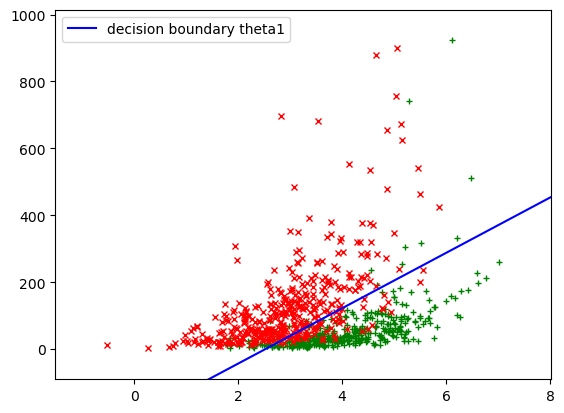

In [15]:
plot(xtrain,ytrain,log.theta)

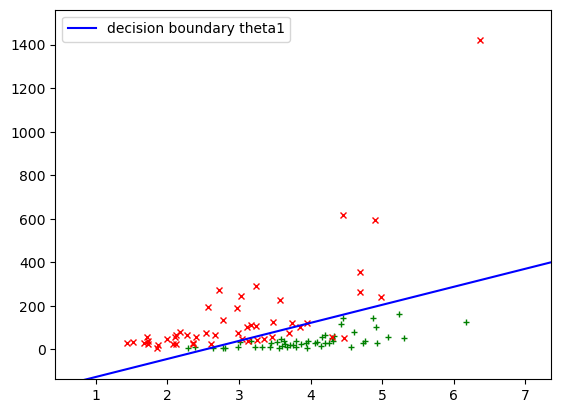

In [16]:
plot(xtest,ytest,log.theta)

In [17]:
class GDA(LinearModel):
    def fit(self,X,Y,intercept):
        
        #remove intercept if present
        if intercept==True:
            X=X[:,1:].copy()

        #shape of m
        m,n=X.shape
        
        #initialize theta
        self.theta=np.zeros(n+1)
        
        #calculate phi from formula
        phi=np.mean(Y==1)
        
        #estimate mu0 and mu1
        mu0=np.sum(np.reshape(Y==0,(-1,1))*X,axis=0)/np.sum(Y==0) #(n)
        mu1=np.sum(np.reshape(Y,(-1,1))*X,axis=0)/np.sum(Y==1) #(n)
        
        
        #estimate sigma inv
        mu=np.reshape(Y==1,(-1,1))*mu1+np.reshape((Y==0),(-1,1))*mu0
        Xcent=X-mu
        sigma= Xcent.T@Xcent/m
        sigmaInv=np.linalg.inv(sigma)
        
        #convert phi,mu0,mu1,sigmainv into theta
        self.theta[0]=0.5*mu0@sigmaInv@mu0-0.5*mu1@sigmaInv@mu1-np.log((1-phi)/phi)
        t=sigmaInv@(mu1-mu0)
        self.theta[1:]=t
        
    def predict(self,X,intercept):
        #add intercept if not there
        if intercept==False:
            X=add_intercept(X)
            
        #predict
        return X@self.theta>=0
    
    
    #accuracy
    def accuracy(self,X,Y,intercept):
        """
        Classification accuracy is returned in %
        =no of correct classifications*100/total examples
        """
        pred=self.predict(X,intercept)
        acc=np.mean(pred==Y)
        return acc*100  

In [18]:
xtrain

array([[  1.        ,   2.91180854,  60.35961272],
       [  1.        ,   3.77474554, 344.1492843 ],
       [  1.        ,   2.61548828, 178.22208681],
       ...,
       [  1.        ,   2.96909526,  20.24997848],
       [  1.        ,   3.95753102,  27.26196973],
       [  1.        ,   4.02533402,  12.23316511]])

In [19]:
gda=GDA()
gda.fit(xtrain,ytrain,intercept=1)

In [20]:
gda.accuracy(xtrain,ytrain,intercept=1)

86.625

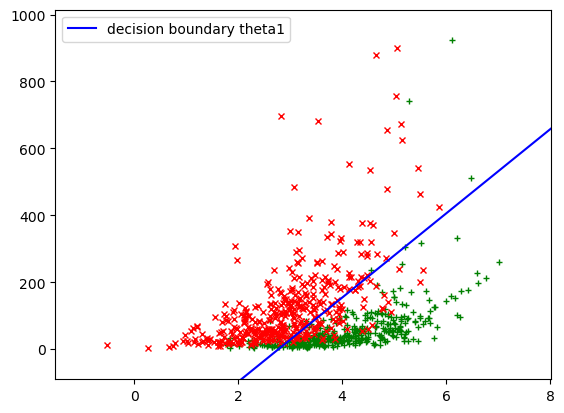

In [21]:
plot(xtrain,ytrain,gda.theta)

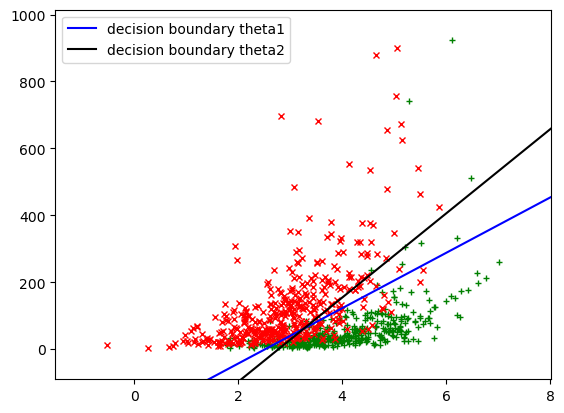

In [22]:
plot(xtrain,ytrain,log.theta,gda.theta)

In [23]:
gda.accuracy(xtest,ytest,intercept=1)

83.0

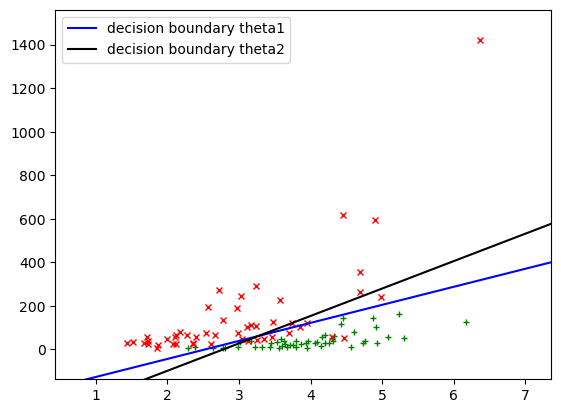

In [24]:
plot(xtest,ytest,log.theta,gda.theta)

In [25]:
xtrain2,ytrain2=load_data('data/ds2_train.csv',Addintercept=1)
log2=LogisticReg()
log2.fit(xtrain2,ytrain2)
gda2=GDA()
gda2.fit(xtrain2,ytrain2,intercept=1)


itr  1  loss:  0.6931471805599452
itr  2  loss:  0.3089767968899755
itr  3  loss:  0.2298455256248797
itr  4  loss:  0.20550760595803147
itr  5  loss:  0.20103088010308312
itr  6  loss:  0.20079300510196024
itr  7  loss:  0.2007920783675636
itr  8  loss:  0.2007920783517119


In [26]:
print(log2.accuracy(xtrain2,ytrain2))
print(gda2.accuracy(xtrain2,ytrain2,intercept=1))

91.5
91.375


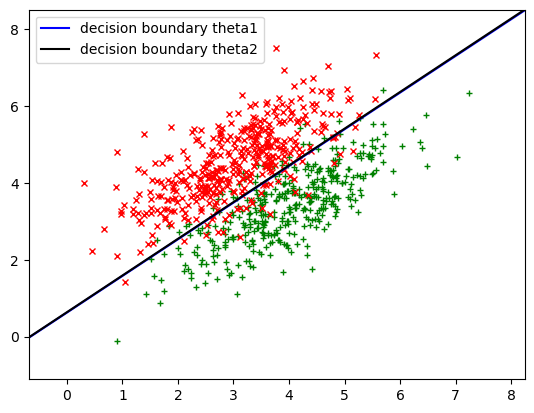

In [27]:
plot(xtrain2,ytrain2,log2.theta,gda2.theta)

In [28]:
xtest2,ytest2=load_data('data/ds2_valid.csv',Addintercept=1)


In [29]:
print(log2.accuracy(xtest2,ytest2))
print(gda2.accuracy(xtest2,ytest2,intercept=1))

91.0
91.0


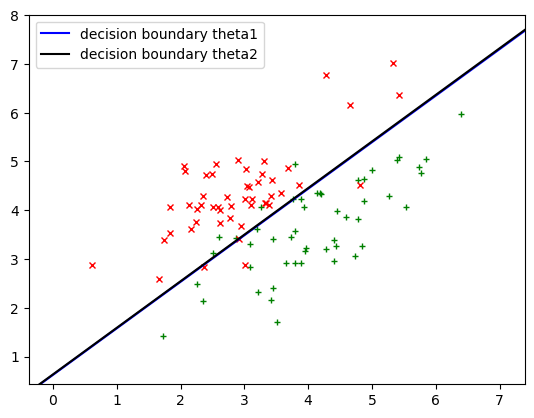

In [30]:
plot(xtest2,ytest2,log2.theta,gda2.theta)

## using scikit learn

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
xtrain,ytrain=load_data('data/ds1_train.csv',Addintercept=False)
skLogReg1=LogisticRegression()
skLogReg1.fit(xtrain,ytrain)

LogisticRegression()

In [38]:
skLogReg1.coef_ #theta

array([[ 2.40345794, -0.02928145]])

In [39]:
skLogReg1.intercept_

array([-6.05497266])

In [69]:
lst=[]
lst.append(skLogReg1.intercept_[0])
lst.append(skLogReg1.coef_[0][0])
lst.append(skLogReg1.coef_[0][1])
xplot=np.hstack((np.ones((xtrain.shape[0],1)),xtrain))

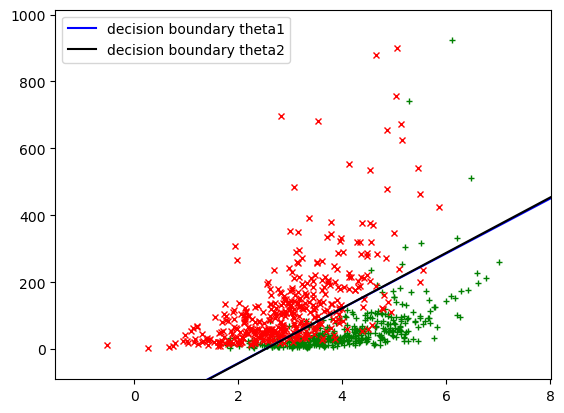

In [70]:
plot(xplot,ytrain,lst,log.theta)

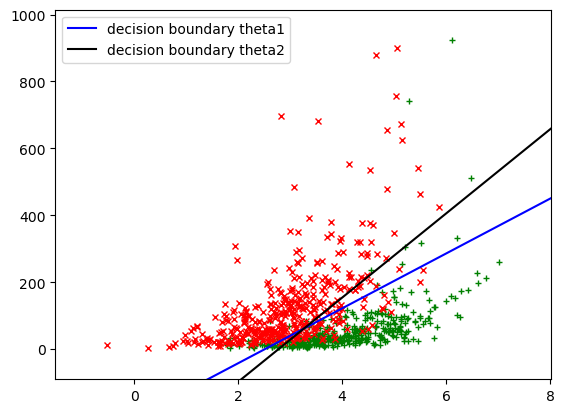

In [71]:
plot(xplot,ytrain,lst,gda.theta)

In [81]:
xtest1,ytest1=load_data('data/ds1_valid.csv',Addintercept=0)


In [83]:

xplot2=np.hstack((np.ones((xtest1.shape[0],1)),xtest1))

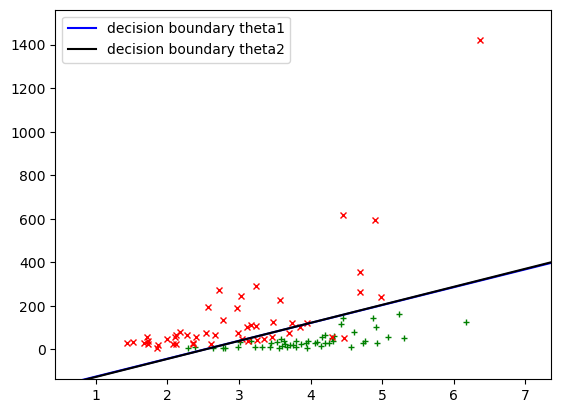

In [84]:
plot(xplot2,ytest1,lst,log.theta)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest1,skLogReg1.predict(xtest1))

0.9

In [87]:
from sklearn.metrics import confusion_matrix
cfMat=confusion_matrix(ytest1,skLogReg1.predict(xtest1))
cfMat

array([[42,  8],
       [ 2, 48]], dtype=int64)

In [89]:
import seaborn as sns
import pandas as pd

Text(0.5, 23.52222222222222, 'Pred')

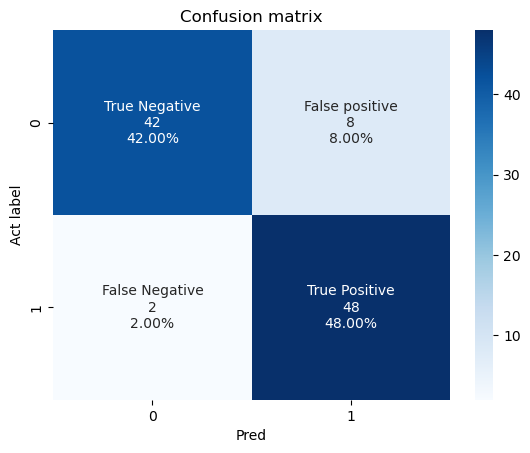

In [121]:
names=['True Negative','False positive','False Negative', 'True Positive']
counts=[f"{value:0.0f}" for value in cfMat.flatten()]
perc=[f"{value:0.2%}"for value in cfMat.flatten()/np.sum(cfMat)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(names,counts,perc)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(pd.DataFrame(cfMat),annot=labels,fmt='',cmap="Blues")
plt.title('Confusion matrix')
plt.ylabel('Act label')
plt.xlabel('Pred')